Aluno: Gustavo Teixeira, Matricula 115098

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam



In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [10]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
## Configurar o encerramento do treinamento quando o val_loss nao melhora
from tensorflow.python.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Epoch 1/10
1250/1250 [==============================] - 18s 5ms/step - loss: 1.3779 - accuracy: 0.5179 - val_loss: 1.2355 - val_accuracy: 0.5571
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0080 - accuracy: 0.6483 - val_loss: 1.1592 - val_accuracy: 0.5926
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8122 - accuracy: 0.7147 - val_loss: 1.1490 - val_accuracy: 0.6153
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6341 - accuracy: 0.7790 - val_loss: 1.3516 - val_accuracy: 0.6007
Epoch 5/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4850 - accuracy: 0.8323 - val_loss: 1.4665 - val_accuracy: 0.6105
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3594 - accuracy: 0.8740 - val_loss: 1.5212 - val_accuracy: 0.6128
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2688 - accuracy: 0.9063 - val_loss: 1.9954 - val_accuracy

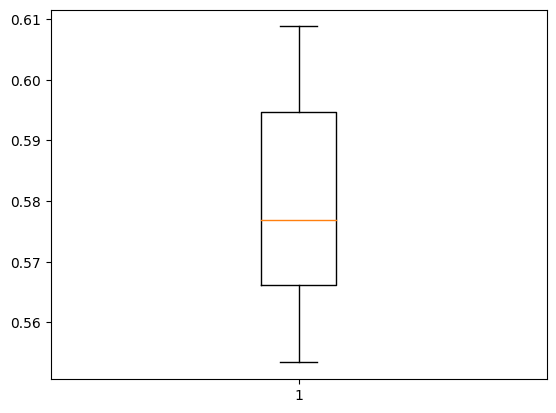

In [11]:
scores = []
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):

    model = define_model()

    # recorta dados de acordo com índices da k-fold
    train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

    # treinamento do modelo
    history = model.fit(train_data, train_target,
                        epochs=10, batch_size=32,
                        validation_data=(val_data, val_target),
                        verbose=1)

    # desempenho do modelo
    _, acc = model.evaluate(val_data, val_target, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # armazena resultados de cada modelo treinado dentro da k-fold
    scores.append(acc)
    histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

In [12]:
np.argmax(model.predict(np.expand_dims(testX[31], axis=0)))

1/1 [==============================] - 0s 130ms/step


4

## Pergunta: Houve muita diferença no desempenho da rede treinada quando comparado ao exemplo?

Acurácia: média=57.998 desvio=1.978


Sim, houve bastante diferenca. Esse modelo apresentou uma acuracia muito baixa para o dataset cifar10

## Realizando alteracao sugerida:
Adicionado mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados

In [13]:
def define_new_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Treinando novamente com a alteracao sugerida


Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 1.3316 - accuracy: 0.5254 - val_loss: 1.4548 - val_accuracy: 0.4840
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9997 - accuracy: 0.6503 - val_loss: 1.0887 - val_accuracy: 0.6186
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8537 - accuracy: 0.6999 - val_loss: 1.0650 - val_accuracy: 0.6343
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7502 - accuracy: 0.7390 - val_loss: 1.0640 - val_accuracy: 0.6426
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6613 - accuracy: 0.7710 - val_loss: 1.0193 - val_accuracy: 0.6604
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5746 - accuracy: 0.8000 - val_loss: 1.5507 - val_accuracy: 0.5807
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5047 - accuracy: 0.8217 - val_loss: 1.0814 - val_accuracy

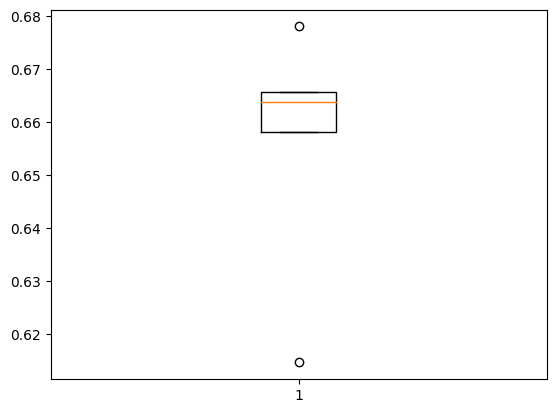

In [14]:
scores = []
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):

    model = define_new_model()

    # recorta dados de acordo com índices da k-fold
    train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

    # treinamento do modelo
    history = model.fit(train_data, train_target,
                        epochs=10, batch_size=32,
                        validation_data=(val_data, val_target),
                        verbose=1)

    # desempenho do modelo
    _, acc = model.evaluate(val_data, val_target, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # armazena resultados de cada modelo treinado dentro da k-fold
    scores.append(acc)
    histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

### Compare os resultados

Acurácia: média=65.612 desvio=2.171

Ao adicionar as camadas extras de Conv2D e MaxPooling, obteve-se um desempenhor melhor para o dataset cifar10, pois ela foi mais capaz de extrair características complexas das imagens, levando a um desempenho melhor na tarefa de classificação.


## Adicionando Dropout

In [15]:
def define_new_model_com_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Adicionando Dropout

    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Adicionando Dropout

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
1250/1250 [==============================] - 9s 5ms/step - loss: 1.4268 - accuracy: 0.4906 - val_loss: 1.2745 - val_accuracy: 0.5566
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1003 - accuracy: 0.6138 - val_loss: 1.0828 - val_accuracy: 0.6194
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9814 - accuracy: 0.6556 - val_loss: 1.0655 - val_accuracy: 0.6287
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9016 - accuracy: 0.6848 - val_loss: 1.0855 - val_accuracy: 0.6155
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8491 - accuracy: 0.7024 - val_loss: 1.0172 - val_accuracy: 0.6437
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7999 - accuracy: 0.7165 - val_loss: 0.9229 - val_accuracy: 0.6776
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7634 - accuracy: 0.7331 - val_loss: 0.9215 - val_accuracy:

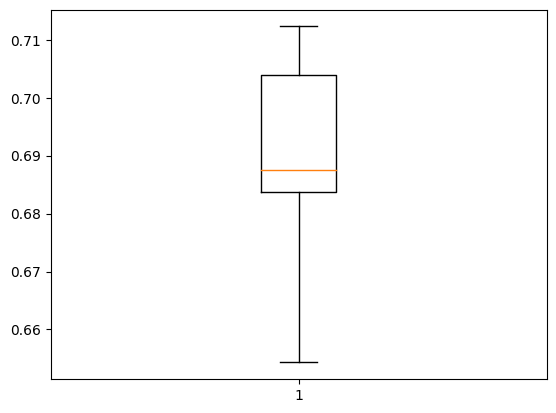

In [16]:
scores = []
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):

    model = define_new_model_com_dropout()

    # recorta dados de acordo com índices da k-fold
    train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

    # treinamento do modelo
    history = model.fit(train_data, train_target,
                        epochs=10, batch_size=32,
                        validation_data=(val_data, val_target),
                        verbose=1)

    # desempenho do modelo
    _, acc = model.evaluate(val_data, val_target, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # armazena resultados de cada modelo treinado dentro da k-fold
    scores.append(acc)
    histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

## Comentando os resultados obtidos

Acurácia: média=68.838 desvio=2.000


Adicionar as camadas de dropout ajudou a melhorar ainda mais (levemente em relacao ao anterior: 65.612) o desempenho do modelo, evitando o overfitting durante o treinamento